In [178]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

## Carga de datos

In [179]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

# Primera exploración

In [180]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [182]:
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [183]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


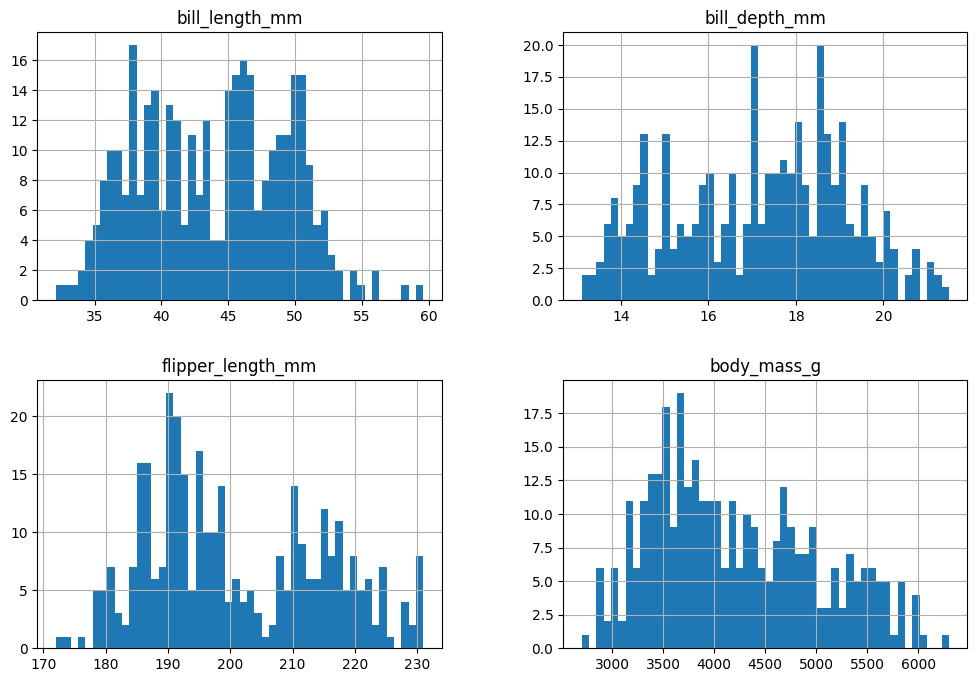

In [184]:
data.drop(columns=["rowid", "year"]).hist(bins=50, figsize=(12,8));

In [185]:
data["body_mass_g"].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [186]:
data["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Mini EDA

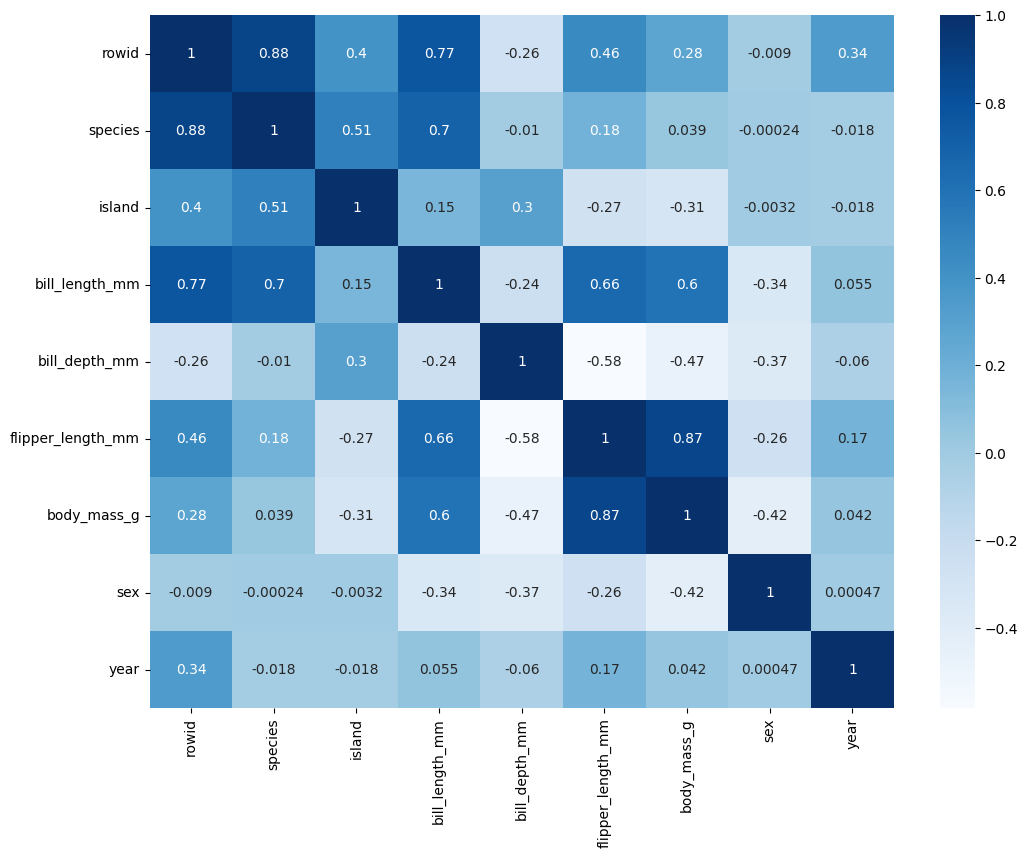

In [187]:
plt.figure(figsize=(12,9))
sns.heatmap(data.replace({"Adelie":0, "Gentoo":1, 'Chinstrap':3, "Torgersen":0, "Biscoe":1, 'Dream':3, "male":0, "female":1}).corr(numeric_only=True), annot=True, cmap = "Blues");
# Si lo hacemos permanente, podría reemplazar al labelencoder

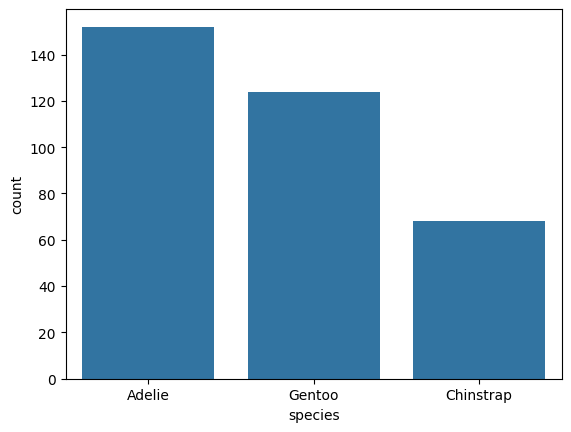

In [188]:
sns.countplot(x="species", data=data);

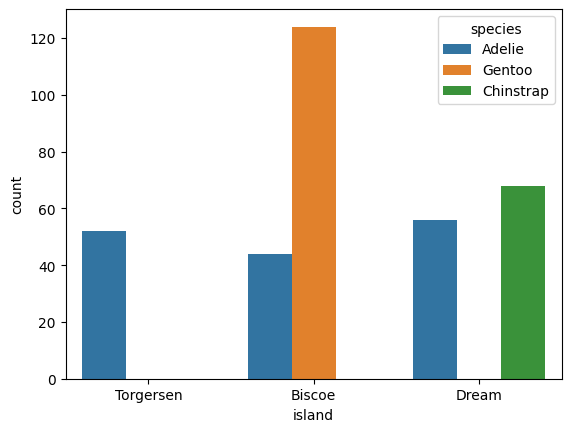

In [189]:
sns.countplot(x="island", hue= "species", data=data);

# Tratamiento de datos

In [190]:
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [191]:
data[data.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [192]:
media = data["bill_length_mm"].mean()
data["bill_length_mm"].fillna(media, inplace=True)

media = data["bill_depth_mm"].mean()
data["bill_depth_mm"].fillna(media, inplace=True)

media = data["flipper_length_mm"].mean()
data["flipper_length_mm"].fillna(media, inplace=True)

media = data["body_mass_g"].mean()
data["body_mass_g"].fillna(media, inplace=True)

In [193]:
data.dropna(inplace=True)

In [194]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Division de los datos

In [195]:
X = data.drop(["species"], axis=1)
y = data["species"]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado

species -> Mapeo

sex ->OHE

island -> label_encoder

numericas -> MinMax

rowid -> Eliminar


In [197]:
X_train.columns

Index(['rowid', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [198]:
X_train.drop("rowid", axis = 1, inplace=True)

col_minmax = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']

mapeo = {"Adelie":0, "Gentoo":1, 'Chinstrap':3}
y_train = y_train.map(mapeo)
y_test = y_test.map(mapeo)

#Label encoder
lb = LabelEncoder()
X_train["island"] = lb.fit(X_train["island"]).transform(X_train["island"])
X_test["island"] = lb.fit(X_test["island"]).transform(X_test["island"])



# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed = OHE.fit_transform(X_train[["sex"]])
transformed_df = pd.DataFrame(transformed, columns=OHE.get_feature_names_out(["sex"]), index=X_train.index)
X_train_sca_ohe = pd.concat([X_train, transformed_df], axis=1)

transformed = OHE.fit_transform(X_test[["sex"]])
transformed_df = pd.DataFrame(transformed, columns=OHE.get_feature_names_out(["sex"]), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test, transformed_df], axis=1)

#MinMax
mmax = MinMaxScaler()
mmax.fit(X_train_sca_ohe[col_minmax])

X_train_sca_mmax = mmax.fit_transform(X_train_sca_ohe[col_minmax])
transformed_df = pd.DataFrame(X_train_sca_mmax, columns=mmax.get_feature_names_out(col_minmax), index=X_train_sca_ohe.index)
X_train_sca_ohe = pd.concat([X_train_sca_ohe, transformed_df], axis=1)

X_test_sca_mmax = mmax.fit_transform(X_test_sca_ohe[col_minmax])
transformed_df = pd.DataFrame(X_test_sca_mmax, columns=mmax.get_feature_names_out(col_minmax), index=X_test_sca_ohe.index)
X_test_sca_ohe = pd.concat([X_test_sca_ohe, transformed_df], axis=1)

In [199]:
X_train_sca_ohe

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,sex_female,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
232,0,49.1,14.5,212.0,4625.0,female,2009,1.0,0.0,0.618182,0.166667,0.677966,0.574627
84,1,37.3,17.8,191.0,3350.0,female,2008,1.0,0.0,0.189091,0.559524,0.322034,0.194030
306,1,40.9,16.6,187.0,3200.0,female,2008,1.0,0.0,0.320000,0.416667,0.254237,0.149254
22,0,35.9,19.2,189.0,3800.0,female,2007,1.0,0.0,0.138182,0.726190,0.288136,0.328358
29,0,40.5,18.9,180.0,3950.0,male,2007,0.0,1.0,0.305455,0.690476,0.135593,0.373134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,49.6,15.0,216.0,4750.0,male,2008,0.0,1.0,0.636364,0.226190,0.745763,0.611940
77,2,37.2,19.4,184.0,3900.0,male,2008,0.0,1.0,0.185455,0.750000,0.203390,0.358209
112,0,39.7,17.7,193.0,3200.0,female,2009,1.0,0.0,0.276364,0.547619,0.355932,0.149254
281,1,45.2,17.8,198.0,3950.0,female,2007,1.0,0.0,0.476364,0.559524,0.440678,0.373134


In [201]:
modelos = {
    "LogisticRegression": LogisticRegression(),
    "SVC":SVC()
}

resultados = {}

for modelo in modelos:
    resultados[modelo]=[cross_val_score(modelos[modelo], X_train_sca_ohe, y_train, cv=3, scoring="r2").mean()]

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jaime\AppData\Roaming\Python\Python311\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'male'

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jaime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jaime\AppData\Roaming\Python\Python311\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'female'
